In [13]:
from datetime import datetime, timedelta
import plotly.graph_objs as go

# Your data
data = [
    {"item_date": "2022-02-20", "item_name": "item1", "scheduled_time": "2022-02-20 08:00:00"},
    {"item_date": "2022-02-20", "item_name": "item2", "scheduled_time": ""},
    {"item_date": "2022-02-21", "item_name": "item3", "scheduled_time": "2022-02-21 09:00:00"},
    {"item_date": "2022-02-21", "item_name": "item4", "scheduled_time": "2022-02-21 10:00:00"},
    {"item_date": "2022-02-22", "item_name": "item5", "scheduled_time": "2022-02-22 11:00:00"}
]

# Convert item_date and scheduled_time strings to datetime objects
for item in data:
    item["item_date"] = datetime.strptime(item["item_date"], "%Y-%m-%d")
    if item["scheduled_time"]:
        item["scheduled_time"] = datetime.strptime(item["scheduled_time"], "%Y-%m-%d %H:%M:%S")

# Get the min and max dates in the data
min_date = min([item["item_date"] for item in data])
max_date = max([item["item_date"] for item in data])

# Create a dictionary to hold scheduling data
scheduling_data = {}
current_date = min_date
while current_date <= max_date:
    scheduling_data[current_date] = {}
    current_date += timedelta(days=1)

# Populate the scheduling data dictionary
for item in data:
    date = item["item_date"]
    if item["scheduled_time"]:
        hour = item["scheduled_time"].hour
        scheduling_data[date][hour] = scheduling_data[date].get(hour, 0) + 1

# Create a list of x and y values for the heatmap
x_values = []
y_values = []
z_values = []
for date, scheduling_hours in scheduling_data.items():
    x_values.append(date)
    for hour in range(24):
        y_values.append(hour)
        z_values.append(scheduling_hours.get(hour, 0))

# Create a Plotly heatmap
fig = go.Figure(
    data=go.Heatmap(
        x=x_values,
        y=y_values,
        z=z_values,
        colorscale="Blues",
        zmin=0,
        zmax=max(z_values),
        colorbar=dict(title="Number of Scheduled Items")
    ),
    layout=go.Layout(
        title="Scheduled Items by Date and Time",
        xaxis=dict(title="Date"),
        yaxis=dict(title="Time"),
    )
)

# Display the heatmap
fig.show()



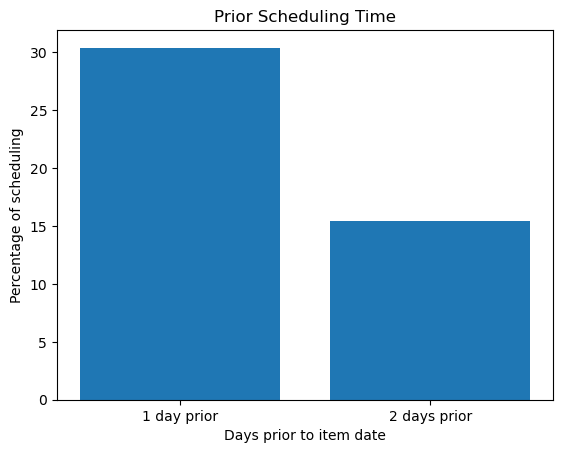

In [18]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load data from JSON file
with open('data.json') as f:
    data = json.load(f)

# Define the date range
start_date = datetime(2021, 11, 21)
end_date = datetime(2021, 11, 30)

# Filter the data based on the selected date range
selected_data = [item for item in data if start_date <= datetime.strptime(item['item_date'], '%Y-%m-%d') <= end_date]

# Calculate the prior scheduling time
one_day_prior = 0
two_days_prior = 0

for item in selected_data:
    schedule_time = datetime.strptime(item['schedule_time'], '%Y-%m-%d %H:%M:%S')
    item_date = datetime.strptime(item['item_date'], '%Y-%m-%d')
    schedule_date = schedule_time.date()
    schedule_datetime = datetime.combine(schedule_date, datetime.min.time())
    time_diff = item_date - schedule_datetime

    if time_diff == timedelta(days=1):
        one_day_prior += 1
    elif time_diff == timedelta(days=2):
        two_days_prior += 1

# Calculate the percentages
total = len(selected_data)
one_day_prior_pct = (one_day_prior / total) * 100
two_days_prior_pct = (two_days_prior / total) * 100
prior_time_pct = [one_day_prior_pct, two_days_prior_pct]

# Create the bar chart
labels = ['1 day prior', '2 days prior']
plt.bar(labels, prior_time_pct)
plt.title('Prior Scheduling Time')
plt.xlabel('Days prior to item date')
plt.ylabel('Percentage of scheduling')
plt.show()
